# A) Importation des bibliothèque

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from collections import Counter
from IPython.display import display, HTML
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, mean_squared_error

# (B)  Chargement et affichage des données  

In [3]:
        # Attempt to read the CSV, skipping bad lines
        df = pd.read_csv(r"C:\Users\Utilisateur\Desktop\projet_miage\data_Pasta.csv")
        df.head()

,Date,Equipements,Temps D'immobilisation
0,1,PLANSICHTER,45
1,1,PERTUBATION ELECTRIQUE,15
2,1,ELEVATEUR,95
3,1,MOTEUR,150
4,1,MOTEUR,45


## (C) Nettoyage et analyse des temps d'arrêt des équipements  

Ce script effectue plusieurs étapes pour analyser les temps d'immobilisation des équipements :  

1. **Nettoyage des noms d'équipements**  
   - Suppression des espaces inutiles  
   - Conversion en minuscules pour uniformité  
   - Remplacement des espaces multiples par un seul  

2. **Séparation des données en deux périodes**  
   - Premiers mois (1 à 6)  
   - Derniers mois (7 à 12)  

3. **Agrégation des données**  
   - Calcul de la récurrence des arrêts par équipement  
   - Somme des temps d'immobilisation
   
4. **Affichage des résultats sous forme de tableaux HTML**  
   - Affichage des données filtrées par période  
   - Présentation des statistiques d'arrêt pour chaque période  


In [4]:
# Nettoyage des noms d'équipements avant l'agrégation
def nettoyer_equipements(df):
    df['Equipements'] = df['Equipements'].str.strip()  # Supprimer les espaces en début et fin
    df['Equipements'] = df['Equipements'].str.lower()  # Convertir en minuscules pour uniformité
    df['Equipements'] = df['Equipements'].str.replace(r'\s+', ' ', regex=True)  # Remplacer multiples espaces par un seul
    return df

# Appliquer le nettoyage sur le DataFrame d'origine
df = nettoyer_equipements(df)

# Séparer les données en deux DataFrames pour les deux périodes: premiers et derniers mois (1-6 et 7-12)
premiers_mois = df[df['Date'] <= 6]
derniers_mois = df[df['Date'] > 6]

# Vérifier le contenu des DataFrames filtrés
#display(HTML("<h2>Premiers Mois</h2>"))
#display(HTML(premiers_mois.to_html(index=False)))

#display(HTML("<h2>Derniers Mois</h2>"))
#display(HTML(derniers_mois.to_html(index=False)))

# Fonction pour calculer la récurrence et la somme des temps d'immobilisation
def calculer_aggregat(df):
    return df.groupby('Equipements').agg(
        Récurrence=('Equipements', 'size'),
        Temps_total=('Temps D\'immobilisation', 'sum')
    ).reset_index()

# Calcul des agrégats pour les deux périodes
aggregat_premiers_mois = calculer_aggregat(premiers_mois)
aggregat_derniers_mois = calculer_aggregat(derniers_mois)

# Afficher les résultats
#display(HTML("<h2>Récurrence pour les Premiers Mois</h2>"))
#display(HTML(aggregat_premiers_mois.to_html(index=False)))

#display(HTML("<h2>Récurrence pour les Derniers Mois</h2>"))
#display(HTML(aggregat_derniers_mois.to_html(index=False)))

In [5]:
print("Données des six primiers mois")
display(aggregat_premiers_mois)

Données des six primiers mois


,Equipements,Récurrence,Temps_total
0,aimant,4,310
1,appareil a cylindre,309,19031
2,approvisionnement,1,180
3,armoire electrique,14,1110
4,arret partiel(entretien/ brusque/…..),107,30513
5,automate,2,25
6,balance (ble/mouture/farine),39,1673
7,ble(traitement et nettoyage),17,5045
8,brosse(son/ ble/ moteur…..),14,1020
9,circuit auxiliaire,1,20


In [26]:
print("données des six derniers mois")
display(aggregat_derniers_mois)

données des six derniers mois


,Equipements,Récurrence,Temps_total
0,aimant,1,5
1,appareil a cylindre,170,13947
2,armoire electrique,10,1146
3,arret partiel(entretien/ brusque/…..),36,15626
4,balance (ble/mouture/farine),70,4022
5,ble(traitement et nettoyage),21,10170
6,brosse(son/ ble/ moteur…..),14,1189
7,carrousel,1,30
8,circuit d'eau,1,110
9,circuit farine/mouture/son,117,5633


In [27]:
# Ensure columns are consistent
def preprocess_data(df, threshold=10):
    df = df.rename(columns={"Récurrence": "Recurrence", "Temps_total": "Total_Time"})
    # Dynamically set the target column
    #df["Dysfunction"] = (df["Recurrence"] + df["Total_Time"] > threshold).astype(int)
    df["Dysfunction"] = (df["Recurrence"] > threshold).astype(int)
    return df

# Preprocess data and ensure thresholds are adjusted for balance
aggregat_premiers_mois = preprocess_data(aggregat_premiers_mois, threshold=3)
aggregat_derniers_mois = preprocess_data(aggregat_derniers_mois, threshold=3)
print("Données des six premiers mois")
display(aggregat_premiers_mois)
print("Données des six derniers mois")
display(aggregat_derniers_mois)

Données des six premiers mois


,Equipements,Recurrence,Total_Time,Dysfunction
0,aimant,4,310,1
1,appareil a cylindre,309,19031,1
2,approvisionnement,1,180,0
3,armoire electrique,14,1110,1
4,arret partiel(entretien/ brusque/…..),107,30513,1
5,automate,2,25,0
6,balance (ble/mouture/farine),39,1673,1
7,ble(traitement et nettoyage),17,5045,1
8,brosse(son/ ble/ moteur…..),14,1020,1
9,circuit auxiliaire,1,20,0


Données des six derniers mois


,Equipements,Recurrence,Total_Time,Dysfunction
0,aimant,1,5,0
1,appareil a cylindre,170,13947,1
2,armoire electrique,10,1146,1
3,arret partiel(entretien/ brusque/…..),36,15626,1
4,balance (ble/mouture/farine),70,4022,1
5,ble(traitement et nettoyage),21,10170,1
6,brosse(son/ ble/ moteur…..),14,1189,1
7,carrousel,1,30,0
8,circuit d'eau,1,110,0
9,circuit farine/mouture/son,117,5633,1


In [28]:
# Ensure at least two classes in y_premiers
if len(Counter(aggregat_premiers_mois["Dysfunction"])) < 2:
    print("Adjusting threshold for premiers dataset to ensure two classes...")
    aggregat_premiers_mois = preprocess_data(aggregat_premiers_mois, threshold=5)

if len(Counter(aggregat_derniers_mois["Dysfunction"])) < 2:
    print("Adjusting threshold for derniers dataset to ensure two classes...")
    aggregat_derniers_mois = preprocess_data(aggregat_derniers_mois, threshold=5)


In [29]:
# Features and target
X_premiers = aggregat_premiers_mois[["Recurrence", "Total_Time"]]
y_premiers = aggregat_premiers_mois["Dysfunction"]

X_derniers = aggregat_derniers_mois[["Recurrence", "Total_Time"]]
y_derniers = aggregat_derniers_mois["Dysfunction"]
display(X_premiers)

,Recurrence,Total_Time
0,4,310
1,309,19031
2,1,180
3,14,1110
4,107,30513
5,2,25
6,39,1673
7,17,5045
8,14,1020
9,1,20


In [30]:
display(y_premiers)

0     1
1     1
2     0
3     1
4     1
5     0
6     1
7     1
8     1
9     0
10    1
11    1
12    1
13    0
14    0
15    0
16    0
17    0
18    0
19    1
20    1
21    1
22    1
23    1
24    0
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    0
33    1
34    1
35    1
36    1
37    0
38    0
39    1
40    0
41    1
42    0
43    0
44    1
45    0
46    0
47    1
48    0
49    1
Name: Dysfunction, dtype: int32

In [31]:
# Standardize the data
scaler = StandardScaler()
X_premiers_scaled = scaler.fit_transform(X_premiers)
X_derniers_scaled = scaler.transform(X_derniers)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    #"Decision Tree": DecisionTreeClassifier(random_state=42),
}

In [32]:
results_premiers = {}
for model_name, model in models.items():
    if len(np.unique(y_premiers)) > 1:  # Ensure at least two classes
        model.fit(X_premiers_scaled, y_premiers)
        results_premiers[model_name] = model.predict_proba(X_premiers_scaled)[:, 1]
    else:
        print(f"Skipping {model_name} for premiers data due to single class issue.")
probs_premiers = pd.DataFrame(results_premiers, index=aggregat_premiers_mois["Equipements"])
# Display table for future probabilities
print("Tabular Display: Predicted Probabilities for Future Data")
# Enhanced display of the DataFrame
pd.set_option('display.float_format', '{:.3f}'.format)  # Set float format for better readability
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Convert DataFrame to HTML for better formatting (optional)
html_table = probs_premiers.style.set_table_attributes('style="font-size: 14px; border-collapse: collapse;"') \
    .set_table_styles([{
        'selector': 'thead th',
        'props': [('background-color', '#f2f2f2'), ('font-weight', 'bold'), ('text-align', 'center')]
    }, {
        'selector': 'td',
        'props': [('border', '1px solid #ddd'), ('padding', '8px')]
    }, {
        'selector': 'tr:hover',
        'props': [('background-color', '#f5f5f5')]
    }]) \
    .set_caption("Predicted Probabilities for Future Data")

# Display the styled DataFrame (in Jupyter Notebook, use display(html_table))
html_table

Tabular Display: Predicted Probabilities for Future Data


,Logistic Regression,Random Forest,Gradient Boosting
Equipements,,,
aimant,0.497456,0.930000,0.999983
appareil a cylindre,0.999922,1.000000,0.999983
approvisionnement,0.476800,0.000000,0.000027
armoire electrique,0.583166,1.000000,0.999983
arret partiel(entretien/ brusque/…..),0.999576,1.000000,0.999983
automate,0.474188,0.000000,0.000027
balance (ble/mouture/farine),0.716074,1.000000,0.999983
ble(traitement et nettoyage),0.759189,1.000000,0.999983
brosse(son/ ble/ moteur…..),0.578964,1.000000,0.999983


In [33]:
# Past Probabilities: Observed historical dysfunction rates
# Bin the data based on Recurrence and Total_Time
aggregat_derniers_mois["Recurrence_Bin"] = pd.cut(
    aggregat_derniers_mois["Recurrence"], bins=5, labels=False
)
aggregat_derniers_mois["Total_Time_Bin"] = pd.cut(
    aggregat_derniers_mois["Total_Time"], bins=5, labels=False
)

In [34]:
# Compute observed probabilities (historical rates of dysfunction)
observed_probs = (
    aggregat_derniers_mois.groupby(["Recurrence_Bin", "Total_Time_Bin"])["Dysfunction"]
    .mean()
    .reset_index()
    .rename(columns={"Dysfunction": "Observed_Probability"}))
display(observed_probs)

,Recurrence_Bin,Total_Time_Bin,Observed_Probability
0,0,0,0.583
1,0,1,1.000
2,1,0,1.000
3,1,1,1.000
4,2,1,1.000
5,4,4,1.000


In [35]:
# Map historical probabilities back to the original dataset
aggregat_derniers_mois = aggregat_derniers_mois.merge(
    observed_probs, on=["Recurrence_Bin", "Total_Time_Bin"], how="left"
)

# Extract relevant columns and set the index
probs_derniers = aggregat_derniers_mois[["Equipements", "Observed_Probability"]].set_index("Equipements")

# Create a DataFrame for observed probabilities with model names
model_names = list(results_premiers.keys())
probs_derniers_expanded = pd.DataFrame(index=probs_derniers.index)

for model_name in model_names:
    probs_derniers_expanded[model_name] = probs_derniers["Observed_Probability"]

# Display table for past probabilities
print("Tabular Display: Observed Probabilities for Past Data")
html_table_past = probs_derniers_expanded.style.set_table_attributes('style="font-size: 14px; border-collapse: collapse;"') \
    .set_table_styles([{
        'selector': 'thead th',
        'props': [('background-color', '#f2f2f2'), ('font-weight', 'bold'), ('text-align', 'center')]
    }, {
        'selector': 'td',
        'props': [('border', '1px solid #ddd'), ('padding', '8px')]
    }, {
        'selector': 'tr:hover',
        'props': [('background-color', '#f5f5f5')]
    }]) \
    .set_caption("Observed Probabilities for Past Data")

html_table_past

Tabular Display: Observed Probabilities for Past Data


,Logistic Regression,Random Forest,Gradient Boosting
Equipements,,,
aimant,0.583333,0.583333,0.583333
appareil a cylindre,1.000000,1.000000,1.000000
armoire electrique,0.583333,0.583333,0.583333
arret partiel(entretien/ brusque/…..),1.000000,1.000000,1.000000
balance (ble/mouture/farine),0.583333,0.583333,0.583333
ble(traitement et nettoyage),0.583333,0.583333,0.583333
brosse(son/ ble/ moteur…..),0.583333,0.583333,0.583333
carrousel,0.583333,0.583333,0.583333
circuit d'eau,0.583333,0.583333,0.583333


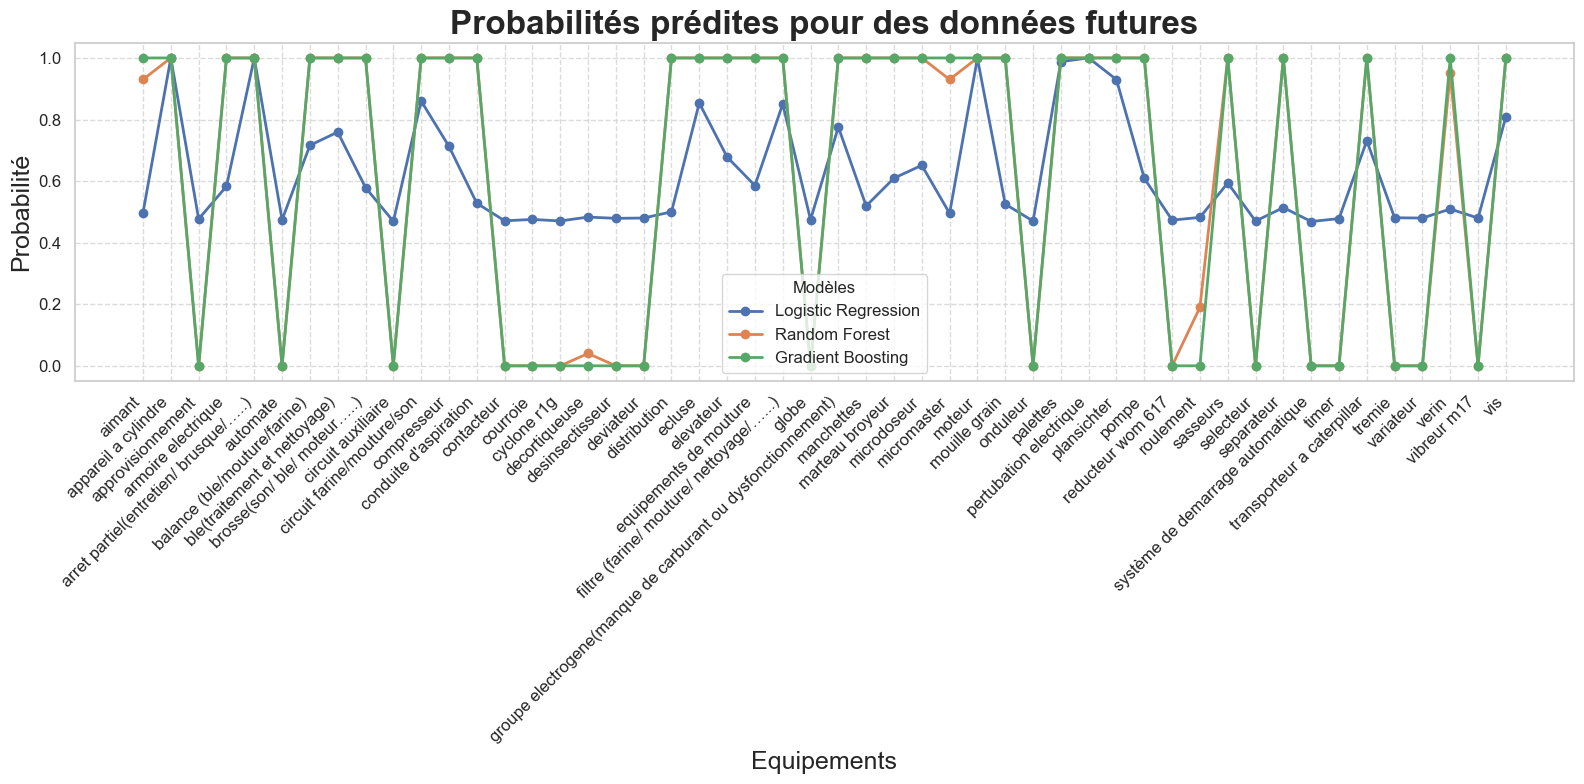

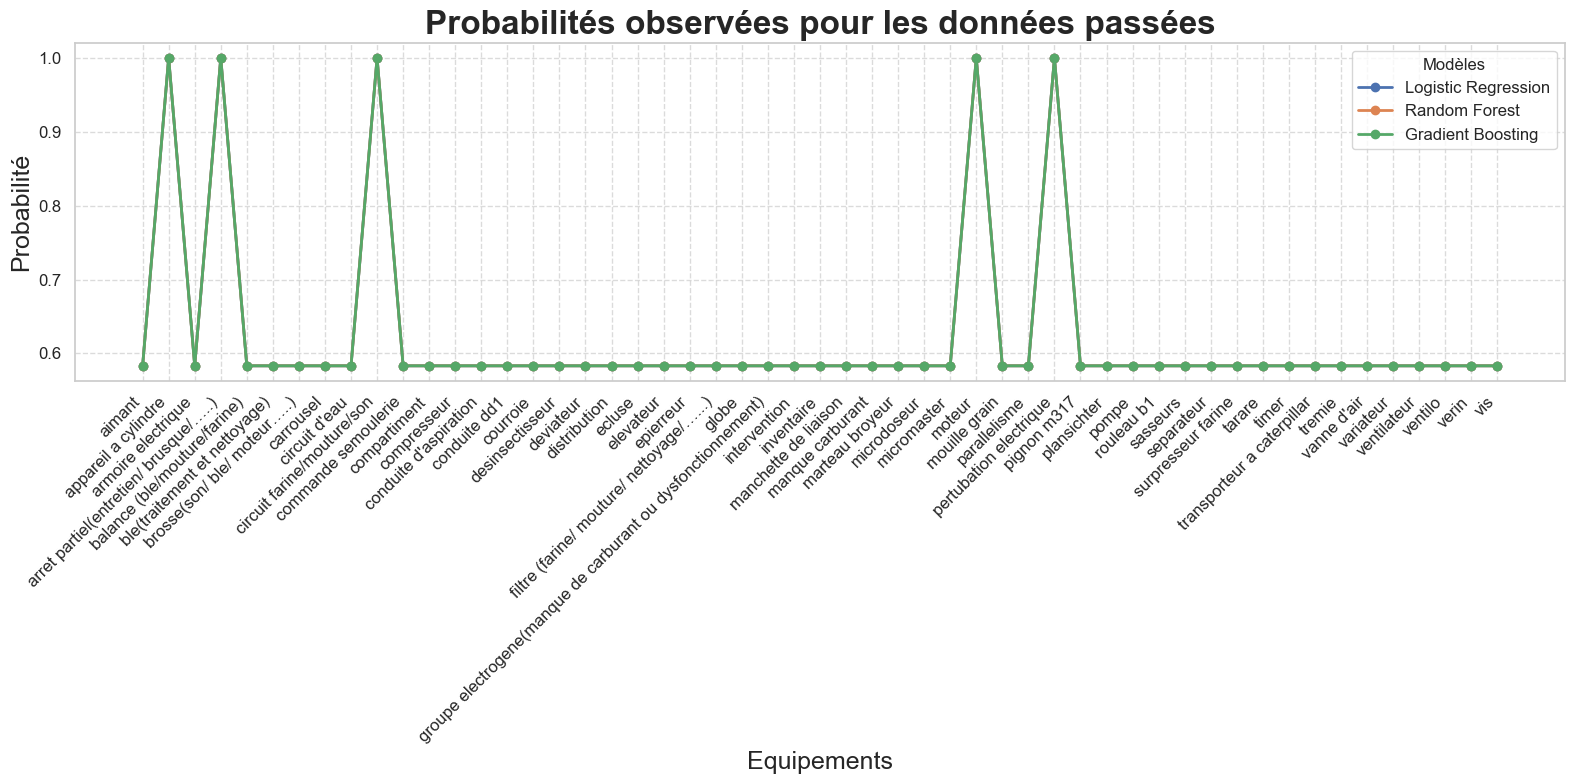

In [36]:
# Enhanced plot probabilities function
def plot_probabilities(probs, title):
    plt.figure(figsize=(16, 8))
    sns.set(style="whitegrid")

    for model_name in probs.columns:
        plt.plot(probs.index, probs[model_name], marker='o', linewidth=2, label=model_name)

    plt.title(title, fontsize=24, fontweight='bold')
    plt.xlabel("Equipements", fontsize=18)
    plt.ylabel("Probabilité", fontsize=18)

    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)

    plt.grid(visible=True, linestyle='--', alpha=0.7)
    plt.legend(title='Modèles', fontsize=12)
    plt.tight_layout()
    plt.show()

# Example of using the enhanced function
plot_probabilities(probs_premiers, "Probabilités prédites pour des données futures")
plot_probabilities(probs_derniers_expanded, "Probabilités observées pour les données passées")

In [37]:
# Clean the index of both DataFrames to ensure consistent formatting
probs_premiers.index = probs_premiers.index.str.strip().str.lower().str.replace(r'\s+', ' ', regex=True)
probs_derniers.index = probs_derniers.index.str.strip().str.lower().str.replace(r'\s+', ' ', regex=True)

# Compare probabilities and compute differences
common_equipments = probs_premiers.index.intersection(probs_derniers.index)


# Check equipment counts before filtering
unique_future = len(probs_premiers)
unique_past = len(probs_derniers)
common_count = len(common_equipments)

# Create a summary DataFrame
summary_data = {
    "Description": ["Unique equipment in future data", "Unique equipment in past data", "Common equipment after filtering"],
    "Count": [unique_future, unique_past, common_count]
}
summary_df = pd.DataFrame(summary_data)
# Create a DataFrame for common equipment
common_equipment_df = pd.DataFrame(common_equipments, columns=["Common Equipment"])

probs_premiers_filtered = probs_premiers.loc[common_equipments]
probs_derniers_filtered = probs_derniers.loc[common_equipments]

# Check for any discrepancies
missing_in_future = set(probs_derniers.index) - set(probs_premiers.index)
missing_in_past = set(probs_premiers.index) - set(probs_derniers.index)

# Create a DataFrame for missing equipment
missing_future_df = pd.DataFrame(sorted(missing_in_future), columns=["Equipment Present in Past but Missing in Future"])
missing_past_df = pd.DataFrame(sorted(missing_in_past), columns=["Equipment Present in Future but Missing in Past"])

# Display all tables in HTML format
display(HTML("<h2>Equipment Summary</h2>"))
display(HTML(summary_df.to_html(index=False)))

if not missing_in_future:
    display(HTML("<h2>No Missing Equipment in Future Data</h2>"))
else:
    #display(HTML("<h2>Equipment Present in Past Data but Missing in Future Data</h2>"))
    display(HTML(missing_future_df.to_html(index=False)))

if not missing_in_past:
    display(HTML("<h2>No Missing Equipment in Past Data</h2>"))
else:
    #display(HTML("<h2>Equipment Present in Future Data but Missing in Past Data</h2>"))
    display(HTML(missing_past_df.to_html(index=False)))
comparison = pd.DataFrame(index=common_equipments)

for model_name in results_premiers.keys():
    if "Observed_Probability" in probs_derniers_filtered.columns:
        comparison[f"Difference_{model_name}"] = (
            probs_derniers_filtered["Observed_Probability"] - probs_premiers_filtered[model_name]
        )
        
# Combine common equipment and their probabilities into a single DataFrame
combined_probs_df = probs_premiers_filtered.join(probs_derniers_filtered, lsuffix='_Future', rsuffix='_Past')

# Display combined probabilities for common equipment
display(HTML("<h2>Probabilities of Common Equipment</h2>"))
display(HTML(combined_probs_df.to_html(index=True)))

Description,Count
Unique equipment in future data,50
Unique equipment in past data,53
Common equipment after filtering,35


Equipment Present in Past but Missing in Future
carrousel
circuit d'eau
commande semoulerie
compartiment
conduite dd1
epierreur
intervention
inventaire
manchette de liaison
manque carburant


Equipment Present in Future but Missing in Past
approvisionnement
automate
circuit auxiliaire
contacteur
cyclone r1g
decortiqueuse
equipements de mouture
manchettes
onduleur
palettes


,Logistic Regression,Random Forest,Gradient Boosting,Observed_Probability
Equipements,,,,
aimant,0.497,0.930,1.000,0.583
appareil a cylindre,1.000,1.000,1.000,1.000
armoire electrique,0.583,1.000,1.000,0.583
arret partiel(entretien/ brusque/…..),1.000,1.000,1.000,1.000
balance (ble/mouture/farine),0.716,1.000,1.000,0.583
ble(traitement et nettoyage),0.759,1.000,1.000,0.583
brosse(son/ ble/ moteur…..),0.579,1.000,1.000,0.583
circuit farine/mouture/son,0.860,1.000,1.000,1.000
compresseur,0.713,1.000,1.000,0.583


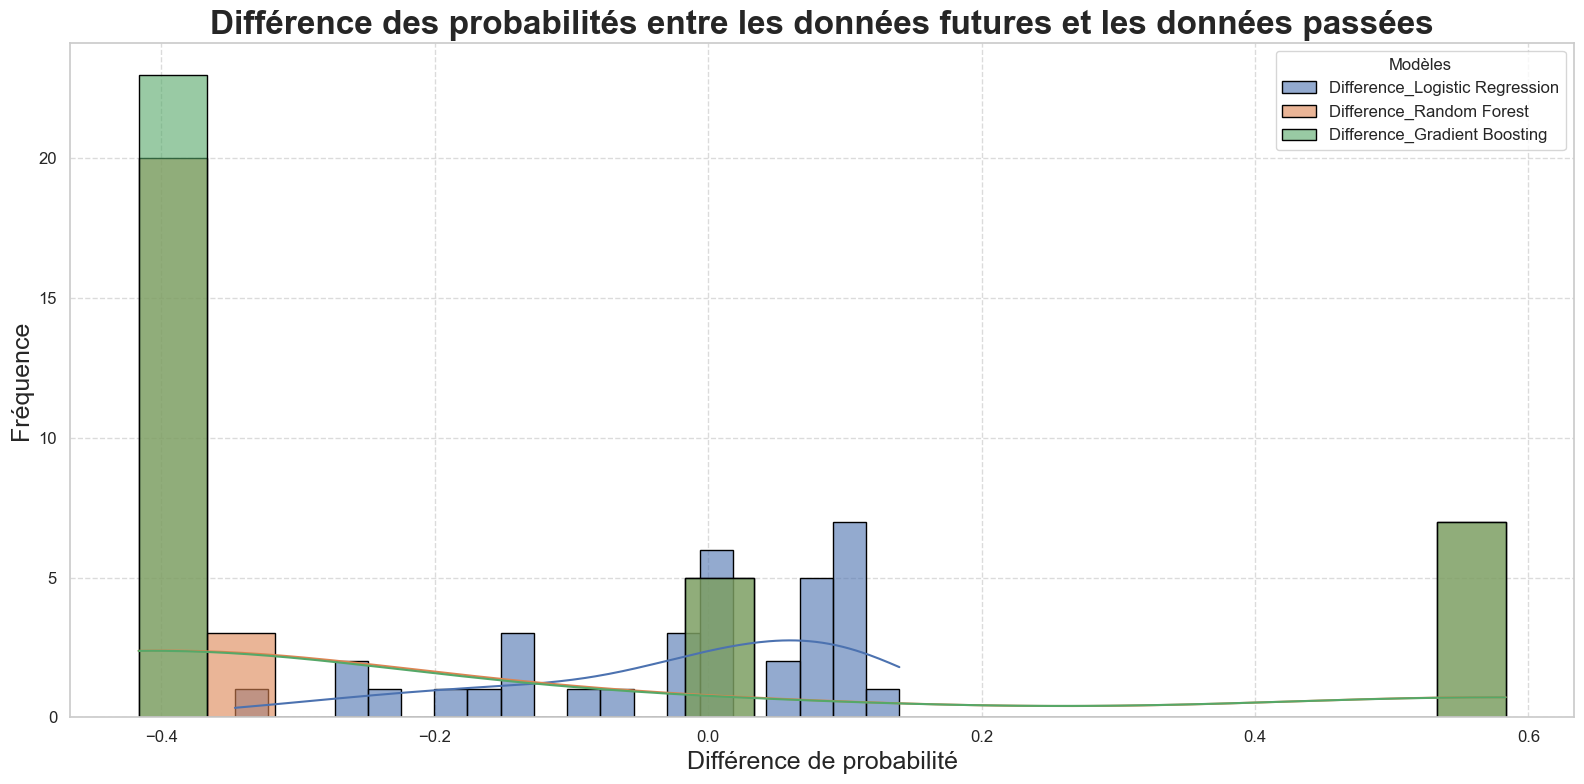

In [38]:
# Enhanced plot differences function
def plot_differences(diff_df):
    plt.figure(figsize=(16, 8))  # Increase figure size for better visibility
    sns.set(style="whitegrid")  # Set the style for better design

    # Plot histograms with KDE for each column
    for column in diff_df.columns:
        sns.histplot(
            diff_df[column], 
            label=column, 
            kde=True, 
            bins=20, 
            alpha=0.6, 
            edgecolor='black', 
            linewidth=1
        )

    plt.title("Différence des probabilités entre les données futures et les données passées", fontsize=24, fontweight='bold')  # Increase title font size and weight
    plt.xlabel("Différence de probabilité", fontsize=18)
    plt.ylabel("Fréquence", fontsize=18)

    # Customize tick parameters for better readability
    plt.xticks(fontsize=12)  # Increase x-axis tick size
    plt.yticks(fontsize=12)  # Increase y-axis tick size

    plt.legend(title='Modèles', fontsize=12)  # Legend with title
    plt.grid(visible=True, linestyle='--', alpha=0.7)  # Add grid for better readability
    plt.tight_layout()
    plt.show()

# Example of using the enhanced function
plot_differences(comparison)

In [39]:
# Evaluate model accuracy based on smaller differences
def evaluate_models(diff_df):
    eval_results = {}
    for column in diff_df.columns:
        avg_diff = diff_df[column].abs().mean()
        eval_results[column] = avg_diff
    return eval_results

# Get evaluation results
accuracy_results = evaluate_models(comparison)

# Convert results to a DataFrame for better presentation
accuracy_df = pd.DataFrame(
    accuracy_results.items(),
    columns=["Modèles", "Écart probabiliste moyen"]
).sort_values(by="Écart probabiliste moyen")

# Style the DataFrame
styled_table = accuracy_df.style.set_table_attributes('style="font-size: 14px; border-collapse: collapse;"') \
    .set_table_styles([
        {"selector": "thead th", "props": [("background-color", "#f2f2f2"), ("font-weight", "bold"), ("text-align", "center")]},
        {"selector": "td", "props": [("border", "1px solid #ddd"), ("padding", "8px")]},
        {"selector": "tr:hover", "props": [("background-color", "#f5f5f5")]}
    ]) \
    .set_caption("Évaluation du modèle basée sur les différences de probabilité moyennes") \
    .format({"Average Probability Difference": "{:.4f}"})

# Display the styled table in Jupyter Notebook or IPython
display(styled_table)

,Modèles,Écart probabiliste moyen
0,Difference_Logistic Regression,0.100208
1,Difference_Random Forest,0.385048
2,Difference_Gradient Boosting,0.390462


In [40]:
# Liste pour stocker les résultats
results = []

# Exemple d'évaluation pour chaque modèle
for model_name, model in models.items():
    if len(np.unique(y_premiers)) > 1:  # Assurez-vous qu'il y a au moins deux classes
        y_pred = model.predict(X_premiers_scaled)
        accuracy = accuracy_score(y_premiers, y_pred)
        recall = recall_score(y_premiers, y_pred)
        # Probabilités pour la courbe ROC
        y_prob = model.predict_proba(X_premiers_scaled)[:, 1]
        auc = roc_auc_score(y_premiers, y_prob)
        mse = mean_squared_error(y_premiers, y_pred)  # Calculer la MSE

        # Ajouter les résultats à la liste
        results.append({
            "Model": model_name,
            "Accuracy": f"{accuracy:.4f}",
            "Recall": f"{recall:.4f}",
            "AUC": f"{auc:.4f}",
            "MSE": f"{mse:.4f}"  # Ajouter la MSE
        })

# Création d'un DataFrame pour les résultats
results_df = pd.DataFrame(results)

# Affichage des résultats sous forme de tableau HTML
html_table = results_df.style.set_table_attributes('style="width: 100%; border-collapse: collapse;"') \
    .set_table_styles([{
        'selector': 'thead th',
        'props': [('background-color', '#f2f2f2'), ('font-weight', 'bold'), ('text-align', 'center')]
    }, {
        'selector': 'td',
        'props': [('border', '1px solid #ddd'), ('padding', '8px')]
    }, {
        'selector': 'tr:hover',
        'props': [('background-color', '#f5f5f5')]
    }]) \
    .set_caption("Évaluation des Modèles")

display(html_table)

,Model,Accuracy,Recall,AUC,MSE
0,Logistic Regression,0.9600,0.9355,1.0000,0.0400
1,Random Forest,1.0000,1.0000,1.0000,0.0000
2,Gradient Boosting,1.0000,1.0000,1.0000,0.0000
